In [ ]:
import pandas as pd 
import numpy as np
import nltk
import re 
import matplotlib.pyplot as plt
import seaborn as sns 

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Tweets Analysis/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
data = data.drop(data[data['airline_sentiment_confidence']<0.5].index, axis=0)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
notused = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

new_data = data.drop(notused, axis=1)
new_data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
...,...,...
14634,negative,@AmericanAir right on cue with the delays👌
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


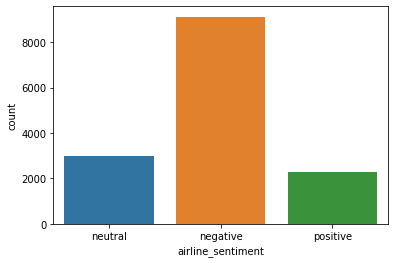

In [ ]:
sns.countplot(x = "airline_sentiment", data = new_data)

In [ ]:
def clean_data(text):
  pattern = re.compile('<.*?>')
  text = re.sub(pattern,'', text)
  pattern = re.compile('https?://\S+|www\.S+')
  text = pattern.sub(r'', text)
  text = re.sub("@[A-Za-z0-9_]+","", text) # + denotes one or more occurances left to it
  text = re.sub("#[A-Za-z0-9_]+","", text) # underscore inside [] denotes action is taken for # containing _ also 
  text = re.sub("[0-9]", "", text) # numbers has no useful meaning howver it appears in word or sentences
  text = re.sub("[.,:]", "", text) # during tokenization they are tokenized as separate tokens so omitting
  return text

new_data['text'] = new_data['text'].apply(clean_data)
new_data

,airline_sentiment,text
0,neutral,What said
2,neutral,I didn't today Must mean I need to take anoth...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $ a flight for seats that...
...,...,...
14634,negative,right on cue with the delays👌
14636,negative,leaving over minutes Late Flight No warnings...
14637,neutral,Please bring American Airlines to
14638,negative,you have my money you change my flight and do...


In [ ]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

cleaned_data=[]
for i in range(len(new_data)):
   tweet=re.sub('[^a-zA-Z]',' ', new_data['text'].iloc[i]) #removes all punctuations numbers 
   tweet=tweet.lower().split() #tokenize
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

# cleaned_data[0:5]
new_data['text']=cleaned_data
new_data

,airline_sentiment,text
0,neutral,said
2,neutral,today must mean need take anoth trip
3,negative,realli aggress blast obnoxi entertain guest fa...
4,negative,realli big bad thing
5,negative,serious would pay flight seat play realli bad ...
...,...,...
14634,negative,right cue delay
14636,negative,leav minut late flight warn commun minut late ...
14637,neutral,pleas bring american airlin
14638,negative,money chang flight answer phone suggest make c...


In [ ]:
datamapping = {'positive':0, 'neutral':1, 'negative':2}
new_data['airline_sentiment'] = new_data['airline_sentiment'].map(datamapping)
new_data

,airline_sentiment,text
0,1,said
2,1,today must mean need take anoth trip
3,2,realli aggress blast obnoxi entertain guest fa...
4,2,realli big bad thing
5,2,serious would pay flight seat play realli bad ...
...,...,...
14634,2,right cue delay
14636,2,leav minut late flight warn commun minut late ...
14637,1,pleas bring american airlin
14638,2,money chang flight answer phone suggest make c...


In [ ]:
X = new_data['text']
y = new_data['airline_sentiment']
X

0                                                     said
2                     today must mean need take anoth trip
3        realli aggress blast obnoxi entertain guest fa...
4                                     realli big bad thing
5        serious would pay flight seat play realli bad ...
                               ...                        
14634                                      right cue delay
14636    leav minut late flight warn commun minut late ...
14637                          pleas bring american airlin
14638    money chang flight answer phone suggest make c...
14639    ppl need know mani seat next flight plz put us...
Name: text, Length: 14404, dtype: object

In [ ]:
y

0        1
2        1
3        2
4        2
5        2
        ..
14634    2
14636    2
14637    1
14638    2
14639    1
Name: airline_sentiment, Length: 14404, dtype: int64

## Using Bag of Words (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_final=cv.fit_transform(X).toarray()
X_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

toarray() convert the result to matrix form

## Using TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii')
X_finall = vectorizer.fit_transform(X)
X_finall

<14404x7581 sparse matrix of type '<class 'numpy.float64'>'
	with 116272 stored elements in Compressed Sparse Row format>

tfidf with stopwords

In [ ]:
# stopset = set(stopwords.words('english'))
# vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset) # or simply (TfidfVectorizer())
# X_finall = vectorizer.fit_transform(cleaned_data) #if the data is in DataFrame then, (cleaned_data.text_column_name)/(cleaned_data[text_column_name])

Now the data are all ready after feature engineering i.e. vectorization

## Splitting the data into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_finall,y,test_size=0.3)

##Using Bag of Words and Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_model=MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred=naive_model.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cf=classification_report(y_test,y_pred)
print(cf)
acc_naive = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       688
           1       0.66      0.36      0.47       911
           2       0.78      0.93      0.85      2723

    accuracy                           0.76      4322
   macro avg       0.73      0.64      0.66      4322
weighted avg       0.75      0.76      0.74      4322



Support gives us the idea on how many instance of a particular class is used. the data is imbalanced with many negative tweets. And, the model is trained highly on negative tweets i.e 2768. The model predicted well for the negative class of tweet with scores of 0.79, 0.92 and 0.85. Overall Accuracy: 0.75

##Using Bag of Words Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logreg_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cf=classification_report(y_test,logreg_pred)
print(cf)
acc_logreg = accuracy_score(y_test,logreg_pred)

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       688
           1       0.62      0.55      0.58       911
           2       0.84      0.89      0.86      2723

    accuracy                           0.78      4322
   macro avg       0.74      0.71      0.72      4322
weighted avg       0.78      0.78      0.78      4322



Logistic Regression showed better prediction than Naive Bayes.

Further, we can use NN to train our model. Use lemmatization instead of stemming. Also, we can using other feature engineering techniques, other than Bag of Words.

## Using TFIDF and Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_model1=MultinomialNB()
naive_model1.fit(X_train1, y_train1)

MultinomialNB()

In [ ]:
y_pred1=naive_model.predict(X_test1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cf1=classification_report(y_test1,y_pred1)
print(cf1)
acc_naive1 = accuracy_score(y_test1,y_pred1)

              precision    recall  f1-score   support

           0       0.88      0.51      0.64       677
           1       0.86      0.39      0.54       916
           2       0.76      0.98      0.86      2729

    accuracy                           0.78      4322
   macro avg       0.83      0.63      0.68      4322
weighted avg       0.80      0.78      0.76      4322



## Using TFIDF and logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logreg_pred1 = logreg1.predict(X_test1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cf1=classification_report(y_test1,logreg_pred1)
print(cf1)
acc_logreg1 = accuracy_score(y_test1,logreg_pred1)

              precision    recall  f1-score   support

           0       0.79      0.59      0.67       677
           1       0.65      0.45      0.53       916
           2       0.80      0.94      0.86      2729

    accuracy                           0.78      4322
   macro avg       0.75      0.66      0.69      4322
weighted avg       0.77      0.78      0.76      4322



## Summary of Model Performances


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Logistic Regression', 'Naive Bayes'],
    'Text Representatin': ['Bag of Words', 'Bag of Words', 'TF-IDF', 'TF-IDF'],
    'Accuracy Score': [acc_logreg, acc_naive, acc_logreg1, acc_naive1]})

models.sort_values(by='Accuracy Score', ascending=False)

,Model,Text Representatin,Accuracy Score
0,Logistic Regression,Bag of Words,0.784128
3,Naive Bayes,TF-IDF,0.782971
2,Logistic Regression,TF-IDF,0.778112
1,Naive Bayes,Bag of Words,0.762147
